# Wine Quality Perceptron

This perceptron uses the data on different samples of wine
to, later on, obtain the info about their pH and residual sugar levels,
as well as their quality score from 0 to 10

Thus, if the perceptron receives an input consisting of some arbitrary wine's
pH and residual sugar level, it will predict whether wine is "good" (+1) or "bad" (-1)

Note: generally, a wine with a **quality score of 7 or higher** is considered a "good" one

In [282]:
data_arr_all_feat = np.array(df)

# Leaving only two features - residual sugar and pH


data_arr = data_arr_all_feat[:, [3, -4, -1]]

In [283]:
import pandas as pd
import numpy as np

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [284]:
good_wine_arr = data_arr[data_arr[:,-1] >= 7, :]
bad_wine_arr = data_arr[data_arr[:,-1] < 7, :]

In [285]:
import matplotlib.pyplot as plt
plt.rcdefaults() 
%matplotlib inline

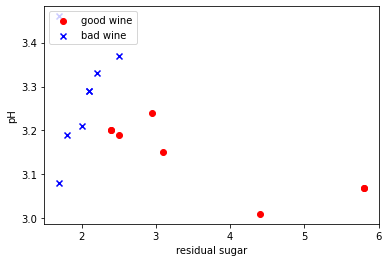

In [286]:
# Trying to pick the data points that would be linearly separable

good_wine_data = good_wine_arr[30:38]
bad_wine_data = bad_wine_arr[98:106]

plt.scatter(good_wine_data[:, 0], good_wine_data[:, 1],
            color='red', marker='o', label='good wine')
plt.scatter(bad_wine_data[:, 0], bad_wine_data[:, 1],
           color='blue', marker='x', label='bad wine')

plt.xlabel('residual sugar')
plt.ylabel('pH')
plt.legend(loc='upper left')
plt.show()

In [287]:
# Combining the bad and good wine data sets
wine_data = np.stack((good_wine_data, bad_wine_data), axis=1)
wine_data = wine_data.reshape(16, 3)

# Shuffling the examples (not features)
np.random.RandomState(1).shuffle(wine_data) ## suffling in-place to avoid one class clustered in top/bottom

# Feature matrix
features = wine_data[:, :2]

# Targets - not 1 or -1 - pure quality score
targets = wine_data[:, 2]


In [288]:
### Perceptron Class Definition

class Perceptron:
    """Perceptron
    
    Parameters:
    1. learning rate - float, 
    2. features - 2D numpy array - shape=(# of examples, # of features), 
    3. targets - a horizontal vector that has example targets in it - shape=(1, # of examples)
    """
    
    def __init__(self, learning_rate, features, targets, random_state):
        self.learning_rate = learning_rate
        self.features = features
        self.targets = targets
        self.random_state = random_state
        
        
    def learn(self, epochs):
        self.epochs = epochs
        
        rgen = np.random.RandomState(self.random_state)
        
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=(1 + self.features.shape[1]) )
        self.errors = []   
        
        for _ in range(self.epochs):
            errors = 0 # num I ll append to errors array after each epoch
            
            # features = [[features-vector], [features-vector], ...]
            # target = [int, int, int, int, ...]
            ## zip => [([feature-vector], target), (..., ...), (..., ...), ...]
            for feature_vector, target in zip(self.features, self.targets):
                expected_value = np.where(target >= 7, 1, -1)
                update = self.learning_rate * (expected_value - self.predict(feature_vector))
                
                #updating the weights
                self.weights[1:] += update * feature_vector
                self.weights[0] += update
                
                
                if update != 0:
                    errors += 1
                
            self.errors.append(errors)
            
        return       
                
        
    def predict(self, feature_vector):   
        prediction = np.dot(feature_vector, self.weights[1:]) + self.weights[0]
        return np.where(prediction >= 0.0, 1, -1)
        

In [289]:
# creating the perceptron
winetron = Perceptron(0.1, features, targets, random_state=1)

In [290]:
# learning
winetron.learn(epochs=100)

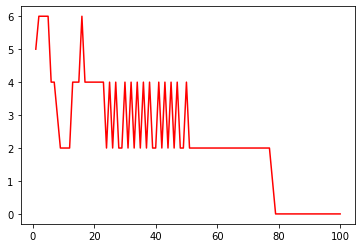

In [291]:
# plotting the # of errors over 100 epochs
plt.plot(range(1, winetron.epochs + 1), winetron.errors, 'red')

In [292]:
# turning quality scores into either +1 or -1
binary_targets = np.where(targets >= 7, 1, -1)

In [293]:
### decision line props
theta = winetron.weights[0]
w_1 = winetron.weights[1]
w_2 = winetron.weights[2]

slope = -(w_1 / w_2)
y_int = -(theta / w_2)

def decision_func(x):
    return (slope * x + y_int)

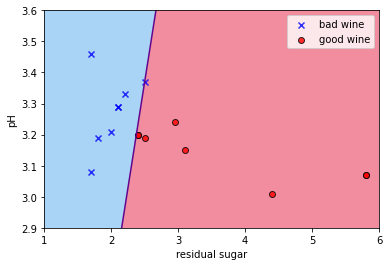

In [294]:
### Plotting the decision line along with data points used for learning
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=1): ### changed resolution

    # setup marker generator and color map
    markers = ('x', 'o', '^', 'v', 's') ### changed marker order
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan') ### changed color order
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision line
    x_vals = np.array(range(-10, 10))
    plt.plot(x_vals, decision_func(x_vals), '#65018a')
    plt.fill_between(x_vals, decision_func(x_vals), color='#f28d9f')
    plt.fill_between(x_vals, decision_func(x_vals), np.max(decision_func(x_vals)), color='#a9d4f5')
    plt.xlim(1, 6)
    plt.ylim(2.9, 3.6)

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=np.where(cl == 1, "good wine", "bad wine"), 
                    edgecolor='black')
        
plot_decision_regions(features, binary_targets, classifier=winetron)
plt.xlabel('residual sugar') ### changed label
plt.ylabel('pH') ### changed label
plt.legend(loc='upper right')

plt.show()